In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
#gains from holding overnight only 
#(loses)

def overnight(portfolio,stock, start_date, end_date):
    p = []
    s = yf.download(stock, start = start_date, end =end_date)
    for count, element in enumerate(s.index):
        #open of day 
        c = s.iloc[count]['Close']
        #open next day
        try:
            
            o = s.iloc[int(count)+1]['Open']
        except:
            print('end')
        #gain or loss from difference
        gain = (o/c)
        portfolio = portfolio * gain
        p.append(portfolio)

    return p

In [4]:
#gains from holding intraday only 
#(loses)

def intraday(portfolio,stock, start_date, end_date):
    p = []
    s = yf.download(stock, start = start_date, end =end_date)
    for count, element in enumerate(s.index):
        #open of day 
        o = s.iloc[count]['Open']
        #close of day
        c = s.iloc[count]['Close']
        #gain or loss from difference
        gain = (c/o)

        portfolio = portfolio * gain 
        
        p.append(portfolio)

    return p

[*********************100%***********************]  1 of 1 completed
end
142.23924329061956
[*********************100%***********************]  1 of 1 completed
193.88602183157957


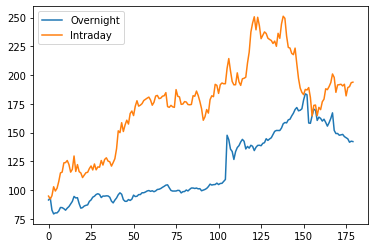

In [8]:
#Pick Stock here 
#VVV
s = 'ZM'
#^^^

#Pick Date Ranges
#VVV
st = '2020-04-01'
ed = '2020-12-16'
#^^^

l = overnight(100, s, st,ed )
#NIGHT
plt.plot(l, label = 'Overnight')
print(l[-1])


#day
x = intraday(100, s, st, ed)
plt.plot(x, label = 'Intraday')

plt.legend()
print(x[-1])